In [6]:
import numpy as np
import pandas as pd
from numpy import *
from pandas import *
import matplotlib
import os
import os.path
from os import *
from os.path import *
import matplotlib.pyplot as plt
from itertools import chain
from sklearn import svm, datasets, metrics

%matplotlib inline

Ground Truth Values
---------------------

In [8]:
df = pd.read_csv('/Users/Rishi/csv_files/02_occupancy_csv/02_summer.csv')

In [9]:
df.head()

,Unnamed: 0,'00:00:00','00:00:01','00:00:02','00:00:03','00:00:04','00:00:05','00:00:06','00:00:07','00:00:08',...,'23:59:50','23:59:51','23:59:52','23:59:53','23:59:54','23:59:55','23:59:56','23:59:57','23:59:58','23:59:59'
0,30-May-2012,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,31-May-2012,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,01-Jun-2012,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,02-Jun-2012,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,03-Jun-2012,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [10]:
df.tail()

,Unnamed: 0,'00:00:00','00:00:01','00:00:02','00:00:03','00:00:04','00:00:05','00:00:06','00:00:07','00:00:08',...,'23:59:50','23:59:51','23:59:52','23:59:53','23:59:54','23:59:55','23:59:56','23:59:57','23:59:58','23:59:59'
78,28-Aug-2012,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
79,29-Aug-2012,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
80,30-Aug-2012,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
81,31-Aug-2012,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
82,01-Sep-2012,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [11]:
index = pd.DatetimeIndex(start = '01-06-2012', periods = 7171200, freq = '1s')

In [12]:
index

DatetimeIndex(['2012-01-06 00:00:00', '2012-01-06 00:00:01',
               '2012-01-06 00:00:02', '2012-01-06 00:00:03',
               '2012-01-06 00:00:04', '2012-01-06 00:00:05',
               '2012-01-06 00:00:06', '2012-01-06 00:00:07',
               '2012-01-06 00:00:08', '2012-01-06 00:00:09', 
               ...
               '2012-03-28 23:59:50', '2012-03-28 23:59:51',
               '2012-03-28 23:59:52', '2012-03-28 23:59:53',
               '2012-03-28 23:59:54', '2012-03-28 23:59:55',
               '2012-03-28 23:59:56', '2012-03-28 23:59:57',
               '2012-03-28 23:59:58', '2012-03-28 23:59:59'],
              dtype='datetime64[ns]', length=7171200, freq='S', tz=None)

In [13]:
out = []
for i in range(len(df)):
    out.append(df.ix[i].values[1:])
out_1d = list(chain.from_iterable(out))

In [14]:
out_1d[:5]

[1, 1, 1, 1, 1]

In [15]:
len(out_1d)

7171200

In [16]:
df_new = pd.Series(out_1d, index = index)

In [17]:
df_new.head()

2012-01-06 00:00:00    1
2012-01-06 00:00:01    1
2012-01-06 00:00:02    1
2012-01-06 00:00:03    1
2012-01-06 00:00:04    1
Freq: S, dtype: int64

In [18]:
df_new.tail()

2012-03-28 23:59:55    1
2012-03-28 23:59:56    1
2012-03-28 23:59:57    1
2012-03-28 23:59:58    1
2012-03-28 23:59:59    1
Freq: S, dtype: int64

In [19]:
df_resampled = df_new.resample("15min")

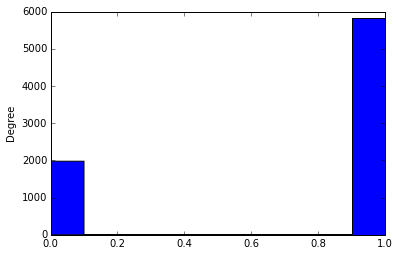

In [20]:
df_resampled.plot(kind = 'hist')

In [21]:
#df_resampled = df_resampled['2012-06-01':]

In [22]:
df_resampled.head()

2012-01-06 00:00:00    1
2012-01-06 00:15:00    1
2012-01-06 00:30:00    1
2012-01-06 00:45:00    1
2012-01-06 01:00:00    1
Freq: 15T, dtype: float64

In [23]:
df_resampled.tail()

2012-03-28 22:45:00    0.000000
2012-03-28 23:00:00    0.000000
2012-03-28 23:15:00    0.000000
2012-03-28 23:30:00    0.977778
2012-03-28 23:45:00    1.000000
Freq: 15T, dtype: float64

The ground truth values are now stored in a variable called df_resampled.



Implementing the Support Vector Machine
---------------

In [25]:
dir_path='/Users/Rishi/NIOMTK_datasets'
store=HDFStore(join(dir_path, 'eco.h5'))
df=store['/building2/elec/meter2']

In [26]:
dataframe = df['power']['active']['2012-06-01':'2012-08-31'].resample('15min')

In [27]:
len_df_values = len(dataframe.values)

In [28]:
len_ground_truth_values = len(df_resampled.values)

In [29]:
lis = []
for i in dataframe.values[:min(len_df_values, len_ground_truth_values)]:
    if np.isnan(i) == False:
        lis.append([i])
    else:
        lis.append([0])
power_array = np.asarray(lis)
print (power_array)

[[ 21.15794373]
 [ 21.1594944 ]
 [ 21.19431496]
 ..., 
 [ 21.63126755]
 [ 21.64588356]
 [ 21.591362  ]]


In [30]:
import matplotlib.pyplot as plt
plt.scatter(arr1, arr2)
plt.show()

NameError: name 'arr1' is not defined

In [32]:
dataframe.head()

2012-06-01 02:00:00+02:00    21.157944
2012-06-01 02:15:00+02:00    21.159494
2012-06-01 02:30:00+02:00    21.194315
2012-06-01 02:45:00+02:00    21.209457
2012-06-01 03:00:00+02:00    21.127626
Freq: 15T, Name: active, dtype: float32

In [33]:
df_resampled.head()

2012-01-06 00:00:00    1
2012-01-06 00:15:00    1
2012-01-06 00:30:00    1
2012-01-06 00:45:00    1
2012-01-06 01:00:00    1
Freq: 15T, dtype: float64

In [34]:
df_resampled.index

DatetimeIndex(['2012-01-06 00:00:00', '2012-01-06 00:15:00',
               '2012-01-06 00:30:00', '2012-01-06 00:45:00',
               '2012-01-06 01:00:00', '2012-01-06 01:15:00',
               '2012-01-06 01:30:00', '2012-01-06 01:45:00',
               '2012-01-06 02:00:00', '2012-01-06 02:15:00', 
               ...
               '2012-03-28 21:30:00', '2012-03-28 21:45:00',
               '2012-03-28 22:00:00', '2012-03-28 22:15:00',
               '2012-03-28 22:30:00', '2012-03-28 22:45:00',
               '2012-03-28 23:00:00', '2012-03-28 23:15:00',
               '2012-03-28 23:30:00', '2012-03-28 23:45:00'],
              dtype='datetime64[ns]', length=7968, freq='15T', tz=None)

In [35]:
df_resampled.index[7968/2]

Timestamp('2012-02-16 12:00:00', offset='15T')

In [36]:
df_resampled_train = df_resampled[:"2012-02-16 12:00:00"]

In [37]:
dataframe_train = dataframe[:"2012-02-16 12:00:00 +02:00"]

In [38]:
dataframe_train = dataframe.head(3985)

In [39]:
len(dataframe_train)

3985

In [40]:
len(df_resampled_train)

3985

In [41]:
#classify= svm.SVC().fit(dataframe_train.values, df_resampled_train.values)

In [42]:
lis = []
for i in dataframe_train:
    if np.isnan(i) == False:
        lis.append([i])
    else:
        lis.append([0])
array = np.asarray(lis)
print (array)

[[ 21.15794373]
 [ 21.1594944 ]
 [ 21.19431496]
 ..., 
 [ 21.65459824]
 [ 21.66837692]
 [ 21.63931656]]


In [50]:
print df_resampled_train.values
classifier = svm.SVC().fit(array, df_resampled_train.values)

[ 1.  1.  1. ...,  0.  0.  0.]


In [44]:
dataframe_test = dataframe.tail(3985)

In [45]:
df_resampled_test = df_resampled.tail(3985)

In [46]:
lis = []
for i in dataframe_test:
    if np.isnan(i) == False:
        lis.append([i])
    else:
        lis.append([0])
array_test = np.asarray(lis)
print (array_test)

[[  42.62877274]
 [  42.4310379 ]
 [   0.        ]
 ..., 
 [ 229.89735413]
 [ 229.85005188]
 [ 230.28823853]]


In [47]:
prediction = classifier.predict(array_test)

In [48]:
arr1 = np.asarray([int(i) for i in prediction])
arr2 = np.asarray([int(i) for i in df_resampled_test.values])

print (metrics.classification_report(arr1, arr2))

             precision    recall  f1-score   support

          0       0.08      0.40      0.13       182
          1       0.96      0.78      0.86      3803

avg / total       0.92      0.76      0.83      3985



In [49]:
count = 0
for i  in range(len(arr1)):
    if arr1[i] == arr2[i]:
        count+=1.0
print (count/len(arr1) )

0.758845671267


Implementing the KNN algorithm
----------------------------------

In [ ]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

In [ ]:
array

In [ ]:
trainingSet = df_resampled_train.values
testSet = df_resampled_test.values
for i in range(len(trainingSet)):
    if random.random() < split:
        testSet[i], trainingSet[i] = trainingSet[i], testSet[i]
        array[i], array_test[i] = array_test[i], array[i]  

In [31]:
testValues

NameError: name 'testValues' is not defined

In [236]:
array_test

array([[  42.62880325],
       [  42.43106461],
       [   0.        ],
       ..., 
       [ 229.89730835],
       [ 229.84979248],
       [ 230.28807068]])

In [237]:
len(df_resampled_train.values)

3985

In [238]:
len(df_resampled_test.values)

3985

In [239]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [240]:
neigh.fit(array, df_resampled_train.values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=3, p=2, weights='uniform')

In [241]:
predictions = []
for i in array_test:
    predictions.append(int(neigh.predict([i])))

In [242]:
tp = 0
tn = 0
fp = 0
fn = 0
for x in range(len(testSet)):
    if int(testSet[x]) == 1 and int(predictions[x]) == 1:
        tp+=1
    elif (int(testSet[x]) == 0 and int(predictions[x]) == 1):
        fp+=1
    elif (int(testSet[x]) == 1 and int(predictions[x]) == 0):
        fn+=1
    else:
        tn+=1
print "TP = ", tp
print "TN = ", tn
print "FP = ", fp
print "FN = ", fn
print "Accuracy = ", (tp + tn + 0.0)/(tp + tn + fp + fn)
print "Precision = ", (tp + 0.0)/ (tp + fp)
print "Recall = ", (tp + 0.0)/(tp + fn)

TP =  2256
TN =  125
FP =  1128
FN =  476
Accuracy =  0.597490589711
Precision =  0.666666666667
Recall =  0.825768667643
